In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# General function to plot X-Y values:
def plot_series(time, series):
    plt.figure(figsize=(10, 6))
    plt.plot(time, series)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.grid(True)
    plt.show()

In [0]:
def trend(time, slope=0):
    return slope * time

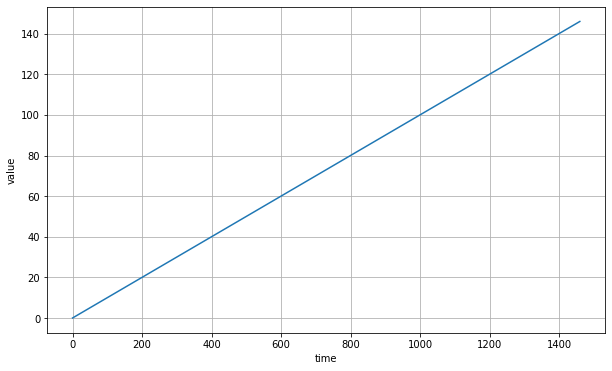

In [0]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)
plot_series(time, series)

In [0]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

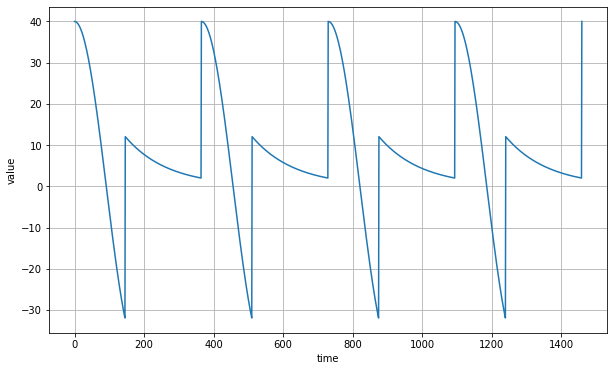

In [0]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

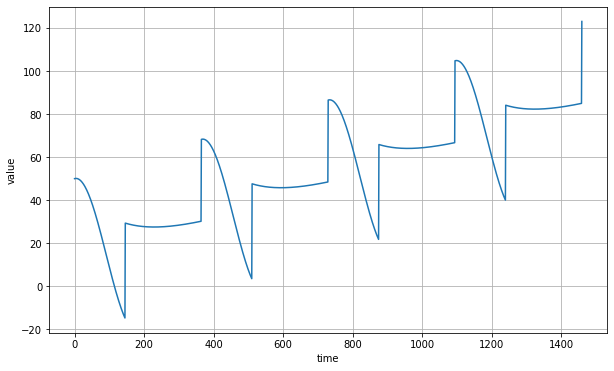

In [0]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

In [0]:
def noise(time, noise_level=1):
    return np.random.randn(len(time)) * noise_level

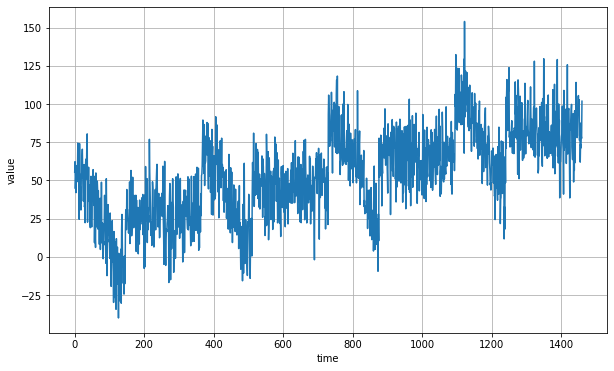

In [0]:
noise_level = 15
noisy_series = series + noise(time, noise_level)
plot_series(time, noisy_series)

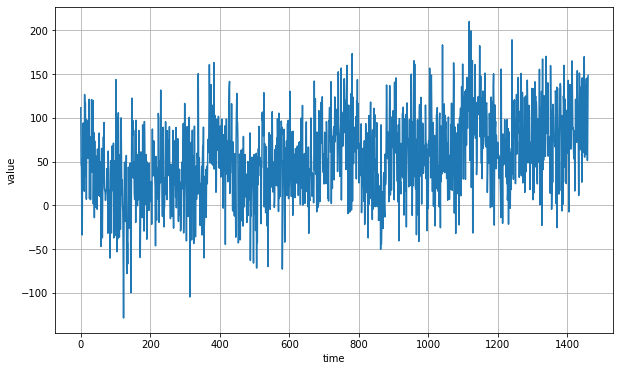

In [0]:
noise_level = 40
noisy_series = series + noise(time, noise_level)
plot_series(time, noisy_series)

**Note:** rho1 and rho2 are the weights associated with autocorrelations at (t - 50) and (t - 33) respectively.

In [0]:
def autocorrelation(time, amplitude):
    rho1 = 0.5
    rho2 = -0.1
    ar = np.random.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time) + 50): # Extend range for the delay
        ar[step] += rho1 * ar[step - 50]
        ar[step] += rho2 * ar[step - 33]
    return ar[50:] * amplitude

**Note:** The following function only autocorrelates with the previous time step, i.e, (t - 1).

In [0]:
def autocorrelation(time, amplitude):
    rho = 0.8
    ar = np.random.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += rho * ar[step - 1]
    return ar[1:] * amplitude

**Note:** Python does not support function overloading. When we define multiple functions with the same name, the later one always overrides the prior. There are 2 different autocorrelation functions defined above, so run the one you want.

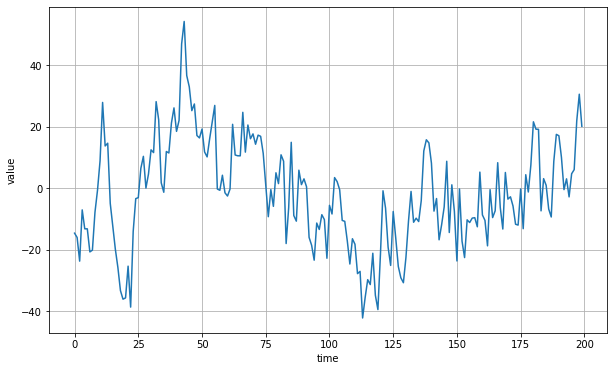

In [0]:
series = autocorrelation(time, 10)
plot_series(time[:200], series[:200])

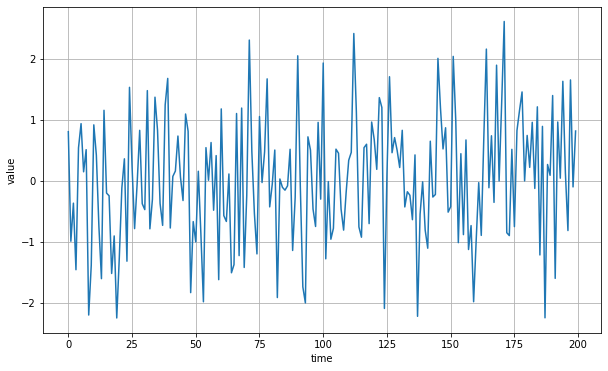

In [0]:
series = noise(time)
plot_series(time[:200], series[:200])

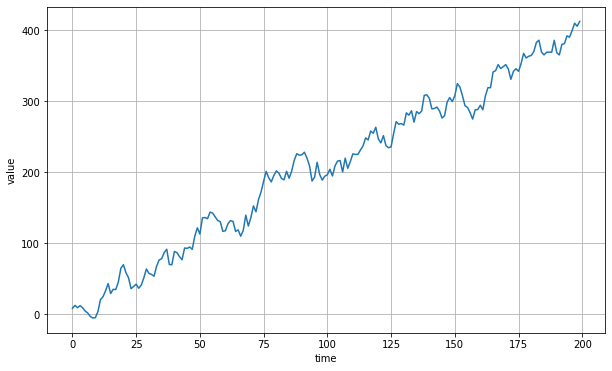

In [0]:
series = autocorrelation(time, 10) + trend(time, 2)
plot_series(time[:200], series[:200])

**Note:** We now create a synthetic series that has autocorrelation, seasonality and trend. These are the patterns that we need to detect in real life signals too.

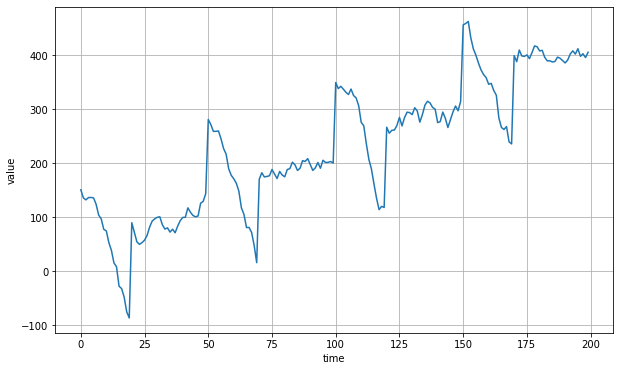

In [0]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])

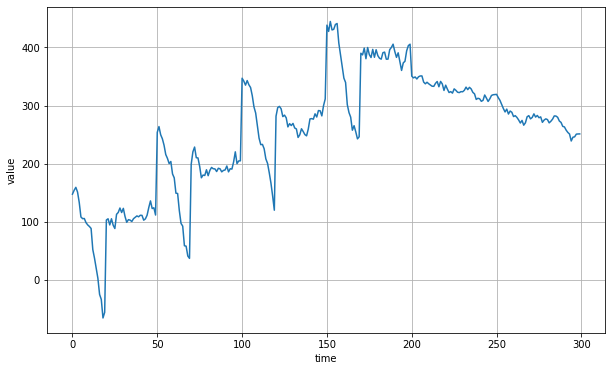

In [0]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
#series += noise(time, 30)
plot_series(time[:300], series[:300])